Head of the DataFrame:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

DataFrame with date as index:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Head of DataFrame with Smoothed Values:
            #Passengers  Holt_Winters_Smoothed
Month                                         
1949-01-01          112             113.535886
1949-02-01          118             115.692005
1949-03-01          132             132.691910
1949-04-01          129             124.304193
1

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


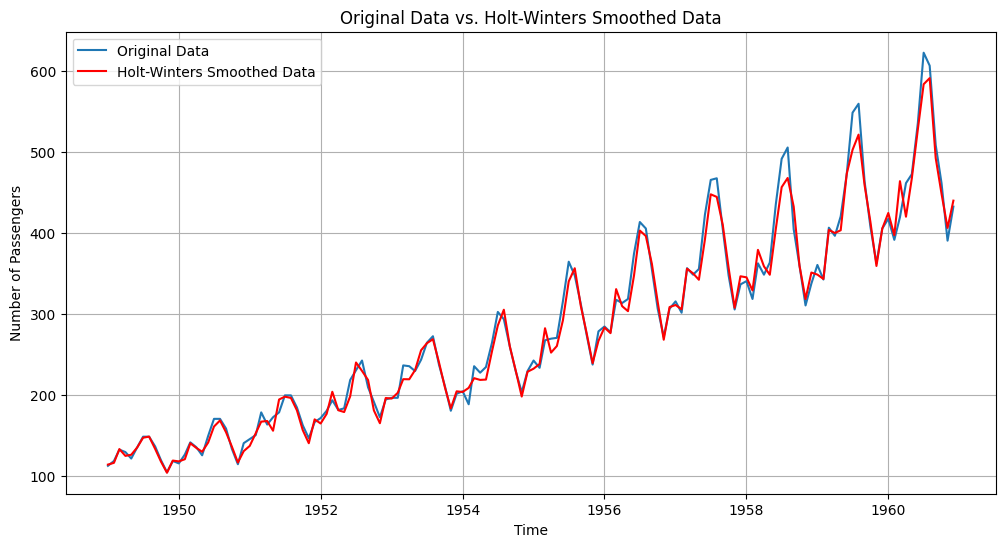

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'  # Replace with the actual path to your CSV file
date_column = 'Month'  # Changed to match your CSV column name
value_column = '#Passengers'  # Changed to match your CSV column name
date_format = '%Y-%m'  # Adjusted to match '1949-01' format
seasonal_period = 12  # Monthly data with yearly seasonality
smoothing_level = 0.8  # Alpha (level smoothing factor)
smoothing_slope = 0.2  # Beta (trend smoothing factor)
smoothing_seasonal = 0.3  # Gamma (seasonal smoothing factor)
model_type = 'multiplicative'  # 'additive' or 'multiplicative' (better for this dataset)

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)
    df = df.dropna(subset=[value_column])

    print("\nDataFrame with date as index:")
    print(df.head())
    print("\nInfo of the DataFrame:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Apply Triple Exponential Smoothing (Holt-Winters) ---
if not df.empty:
    try:
        # Fit the Holt-Winters model
        model = ExponentialSmoothing(
            df[value_column],
            seasonal=model_type,
            seasonal_periods=seasonal_period,
            initialization_method="estimated"  # Or "legacy"
        )
        fit = model.fit(
            smoothing_level=smoothing_level,
            smoothing_trend=smoothing_slope,
            smoothing_seasonal=smoothing_seasonal,
            optimized=False  # Set to True to let the algorithm optimize smoothing parameters
        )

        # Get the smoothed values
        df['Holt_Winters_Smoothed'] = fit.fittedvalues
        print("\nHead of DataFrame with Smoothed Values:")
        print(df.head())

        # --- Plot the original data and the smoothed data ---
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df[value_column], label='Original Data')
        plt.plot(df.index, df['Holt_Winters_Smoothed'], label='Holt-Winters Smoothed Data', color='red')
        plt.title('Original Data vs. Holt-Winters Smoothed Data')
        plt.xlabel('Time')
        plt.ylabel('Number of Passengers')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error applying Holt-Winters method: {e}")

else:
    print("DataFrame is empty, cannot apply Holt-Winters method.")